In [1]:
import matplotlib.pyplot as plt
%run project_neighborhood.ipynb

In [2]:
def generate_points_square(n, square_size=(1,1)):
    """Return n points generated randomly (uniform law) in the square. Square_size should be tuple"""
    
    x = np.around(np.random.random(n)*square_size[0], 4)
    y = np.around(np.random.random(n)*square_size[1], 4)
    # We keep only 4 decimals to simplify
    
    return [(x[i], y[i]) for i in range(len(x))]

In [3]:
def uniform_clusters(c,k):
    """Same function as in Experiments.ipynb"""
    
    def limit(x): #This function assures that all points will be in the square [0,1]x[0,1]
        if x > 1:
            return 1
        if x < 0: 
            return 0
        else:
            return x
    
    centers = [(np.random.uniform(0,1), np.random.uniform(0,1)) for _ in range(c)] #On génère c centre
    radius = [np.random.uniform(1/(3*c),1/(2*c)) for _ in range(c)] #Un rayon entre 1/5c et 1/3c pour chacun d'eux
    points = []
    
    #Un génère k points uniformément dans chaque disque de centre et rayon calculé précedemment
    for i in range(c):
        for j in range(k):
            t = np.random.uniform(0,2*np.pi)
            d = np.random.uniform(0,radius[i])
            points.append((limit(centers[i][0]+d*np.cos(t)),limit(centers[i][1]+d*np.sin(t))))
        
    return clean_P(points)


def clean_P(P):
    """It may happen that P contain duplicates because P is a list and not a set.
    Occurs frequently with the uniform_cluster function. This function remove all duplicates.
    The time lost here is very small compared to the runtime of graph creation algorithms."""
    
    return list(dict.fromkeys(P))

In [4]:
def set_to_list(P, graph):
    """Transforms the graph in an adapted data structure for visual representation.
    The datastructure is a simple list of edges"""
    
    new_g = []
    for i,s in enumerate(graph):
        ref = P[i]
        for point in s:
            edge = (ref, point)     # tuple representing the edge
            if not(edge[::-1] in new_g):
                new_g.append(edge)
    
    return new_g

In [5]:
def P_to_xy(P):
    """Returns the lists of x and y coordinates of the point in P"""
    x, y = [], []
    for p in P:
        x.append(p[0])
        y.append(p[1])
    return x,y

In [6]:
def add_line(p1, p2, color):
    """Adds a line between p1 and p2 for visual representation"""
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]], linewidth=2, c=color)

In [7]:
def plot_graph(P, graph=None, title=None, c='g'):
    """Takes a list of points P to plot a visual representation of its graph.
    Uses the fastest function to create the graph (quadratic complexity here) if needed"""
    
    if graph==None: graph = quadra_algo_neighbors(P)
    
    # To avoid useless repetition, we use a more appropriate data structure of the graph
    edges = set_to_list(P, graph)
    
    x, y = P_to_xy(P)
    
    # We fist plot the vertices
    plt.scatter(x, y, linewidths=1.5, marker='+')
    
    # We add the edges
    for e in edges:
        add_line(e[0], e[1], c)
        
    if title!=None:
        plt.title(title)
    
    # plt.show()

In [8]:
# Copiées depuis Algorithmes_subsampling.ipynb

def distanceE(i,P):
    #Retourne la distance du point i à l'ensemble de point P, ainsi qu'un point de P réalisant la distance.
    #Complexité en O(len(P))

    d = distance(i,P[0])
    pA = P[0]
    for point in P:
        if d > distance(i,point):
            d = distance(i,point)
            pA = point
    
    return d, pA


def Task2(P,p,k):
    S = [P.pop(P.index(p))] #O(n)
    
    distP = {point: distanceE(point,S)[0] for point in P} 
    #Ce dictionnaire stockera les distances des points de P à S
    
    
    for i in range(k-1): #k-1 itérations pour obtenir un sample de k points
        dMax = 0
        targetP = P[0]
        
        for point in P: #On trouve le point le plus de S dans P en cherchant le maximum dans distP
            if dMax < distP[point]:
                dMax = distP[point]
                targetP = point
                
        S.append(targetP) #On ajoute à S le point trouvé
        P.pop(P.index(targetP)) #On le supprime de P
        
        for point in P: #On met à jour les entrées de distP
            distP[point] = min(distP[point],distance(point,targetP))
            
    return S

In [9]:
def time_graph(f, P):
    """Measures the process time taken to create the graph of set of points P with function f"""
    
    t_start = time.process_time_ns()
    graph = f(P)
    t_end = time.process_time_ns()
    
    return graph, t_end-t_start

## Vérification des trois algorithmes

Sur une distribution uniforme de points

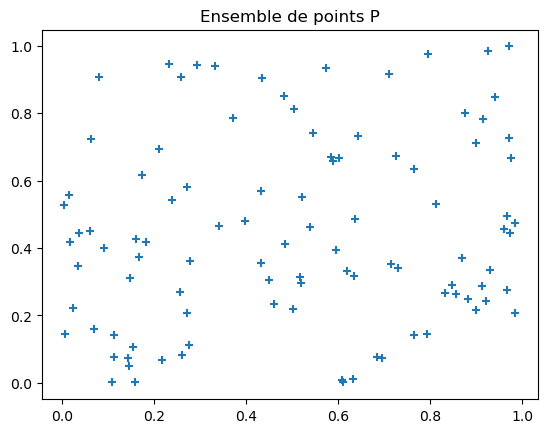

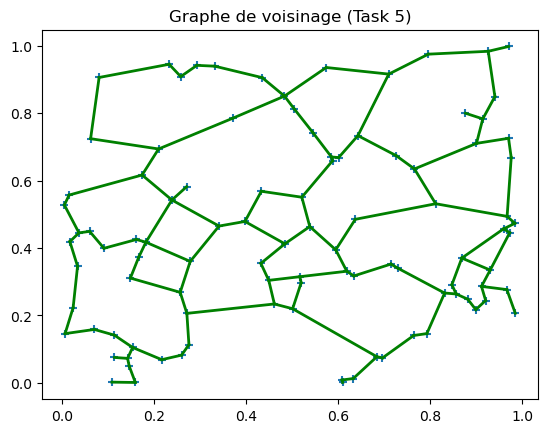

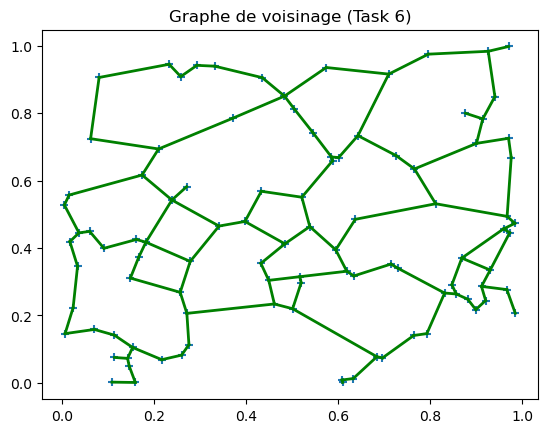

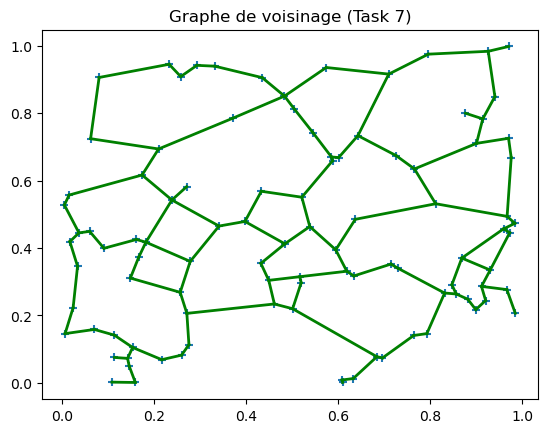

Les fonctions des Tasks 5 et 6 donnent le même résultat
Les fonctions des Tasks 5 et 7 donnent le même résultat


In [10]:
P = generate_points_square(100)

g_1 = naive_neighbors(P)
g_2 = quadra_algo_neighbors(P)
g_3 = graph_via_update(P)
    
# Affichage de P
x, y = P_to_xy(P)
plt.scatter(x, y, linewidths=1.5, marker='+')
plt.title("Ensemble de points P")
plt.show()

# Affichage des graphes obtenus
plot_graph(P, g_1, "Graphe de voisinage (Task 5)")
plt.show()
plot_graph(P, g_2, "Graphe de voisinage (Task 6)")
plt.show()
plot_graph(P, g_3, "Graphe de voisinage (Task 7)")
plt.show()

# Vérification formelle de l'égalité des résultats
if g_1==g_2:
    print("Les fonctions des Tasks 5 et 6 donnent le même résultat")
else:
    print("Erreur entre les fonctions des Tasks 5 et 6")
    
if g_1==g_3:
    print("Les fonctions des Tasks 5 et 7 donnent le même résultat")
else:
    print("Erreur entre les focntions des Tasks 5 et 7")

Sur une distribution de points en clusters

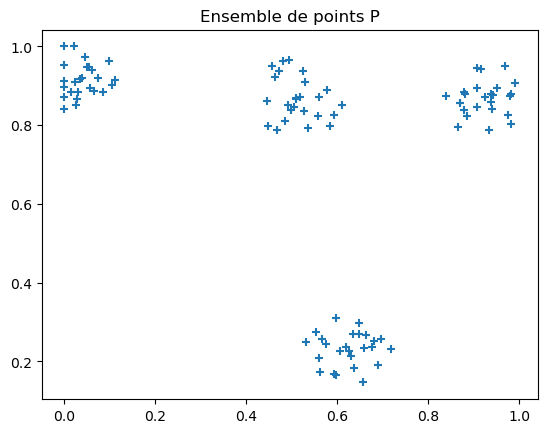

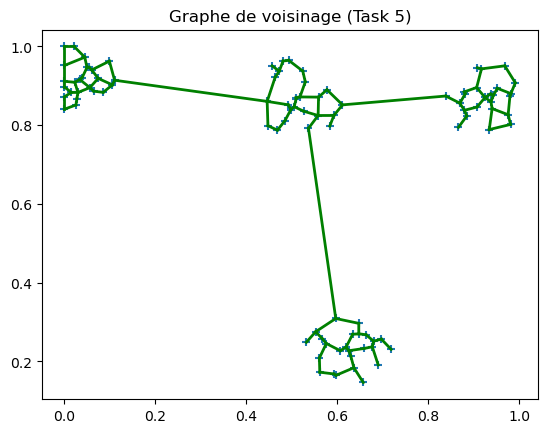

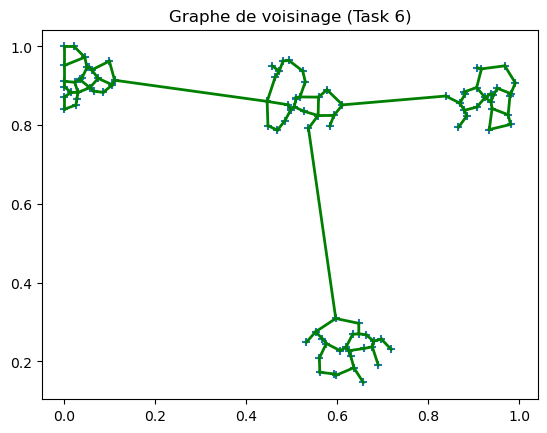

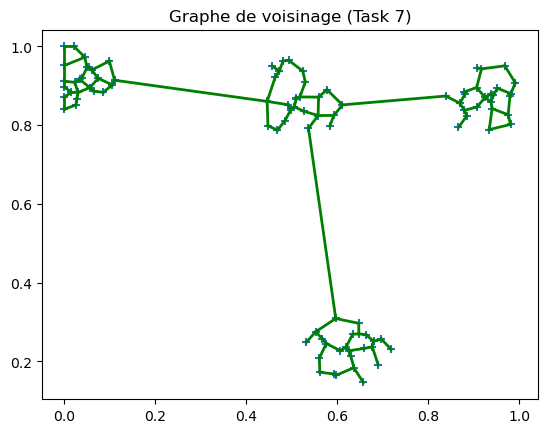

Les fonctions des Tasks 5 et 6 donnent le même résultat
Les fonctions des Tasks 5 et 7 donnent le même résultat


In [11]:
P = uniform_clusters(4,25)

g_1 = naive_neighbors(P)
g_2 = quadra_algo_neighbors(P)
g_3 = graph_via_update(P)
    
# Affichage de P
x, y = P_to_xy(P)
plt.scatter(x, y, linewidths=1.5, marker='+')
plt.title("Ensemble de points P")
plt.show()

# Affichage des graphes obtenus
plot_graph(P, g_1, "Graphe de voisinage (Task 5)")
plt.show()
plot_graph(P, g_2, "Graphe de voisinage (Task 6)")
plt.show()
plot_graph(P, g_3, "Graphe de voisinage (Task 7)")
plt.show()

# Vérification formelle de l'égalité des résultats
if g_1==g_2:
    print("Les fonctions des Tasks 5 et 6 donnent le même résultat")
else:
    print("Erreur entre les fonctions des Tasks 5 et 6")
    
if g_1==g_3:
    print("Les fonctions des Tasks 5 et 7 donnent le même résultat")
else:
    print("Erreur entre les fonctions des Tasks 5 et 7")

## Mesure des performances des algorithmes

Comme les deuxièmes et troisièmes fonctions pour créer le graphe de voisinage reposent sur la même base, et comme la fonction update_graph n'a pas vocation à être utilisée pour créer tout un graphe, nous nous intéressons uniquement à naive_neighbors et quadra_algo_neighbors

In [12]:
def time_graph(f, P):
    """Measures the process time taken to create the graph of set of points P with function f.
    Returs time difference in seconds (not ns)"""
    
    t_start = time.process_time_ns()
    graph = f(P)
    t_end = time.process_time_ns()
    
    return graph, (t_end-t_start)*(0.1**9)

In [13]:
def compare_functions(f1, f2, P):
    """Compares the process time needed to create the graph of P for the two functions.
    Verifies at the same time that the two graphs generated are identical.
    The tests should be run on a fairly great number of points : it seems that n<=30 only returns t=0,
    and n<=60 isn't always non zero."""

    g1, t1 = time_graph(f1, P)
    g2, t2 = time_graph(f2, P)
    
    if test(g1, g2): same = True
    else : 
        same = False
        print("Error : results are different")
        
    delta_t = t2-t1
    
    print("time for function 1 : ", t1)
    print("time for function 2 : ", t2)
    print("The difference of process time is in NANOSECONDS (t2-t1) : ", delta_t)
    print("The difference of process time is in SECONDS (t2-t1) : ", delta_t*(0.1**9))
    print(" The variation of speed in percentage (t2-t1)/t1 is : ", delta_t*100/t1, "%")
    
    return same, delta_t

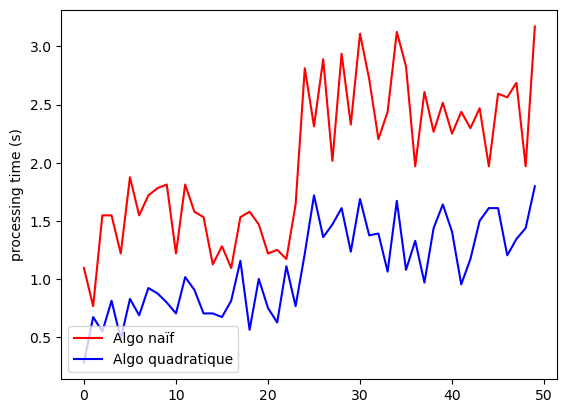

In [14]:
# Comparaison pour une génération uniforme des points

perf_f1 = []
perf_f2 = []
# perf_f3 = []

nb_set = 50
len_set = 300

for i in range(nb_set):
    P = generate_points_square(len_set)
    perf_f1.append(time_graph(naive_neighbors, P)[1])
    perf_f2.append(time_graph(quadra_algo_neighbors, P)[1])
    
plt.plot(range(nb_set), perf_f1, c='r', label='Algo naïf')
plt.plot(range(nb_set), perf_f2, c='b', label='Algo quadratique')

plt.legend(loc="lower left")
plt.ylabel("processing time (s)")
plt.show()

Ce graphique prouve la meilleure efficacité de l'algorithme en complexité quadratique pour des ensemble P de taille conséquente.  Regardons pour des tailles plus faibles si cela est maintenu.

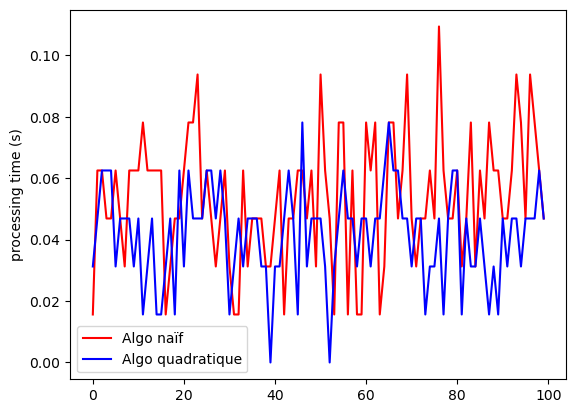

In [15]:
perf_f1 = []
perf_f2 = []
# perf_f3 = []

nb_set = 100
len_set = 50

for i in range(nb_set):
    P = generate_points_square(len_set)
    perf_f1.append(time_graph(naive_neighbors, P)[1])
    perf_f2.append(time_graph(quadra_algo_neighbors, P)[1])
    
plt.plot(range(nb_set), perf_f1, c='r', label='Algo naïf')
plt.plot(range(nb_set), perf_f2, c='b', label='Algo quadratique')

plt.legend(loc="lower left")
plt.ylabel("processing time (s)")
plt.show()

Il est ici impossible d'effectuer une quelconque déduction. Essayons maintenant avec une génération de points plus ordonnée.

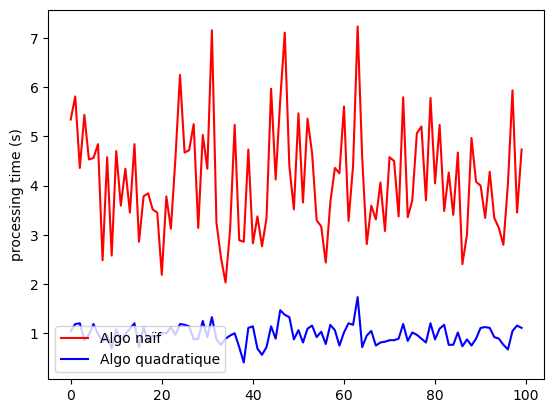

In [17]:
perf_f1 = []
perf_f2 = []
# perf_f3 = []

nb_set = 100
c = 3
k = 75

for i in range(nb_set):
    P = uniform_clusters(c, k)
    perf_f1.append(time_graph(naive_neighbors, P)[1])
    perf_f2.append(time_graph(quadra_algo_neighbors, P)[1])
    
plt.plot(range(nb_set), perf_f1, c='r', label='Algo naïf')
plt.plot(range(nb_set), perf_f2, c='b', label='Algo quadratique')

plt.legend(loc="lower left")
plt.ylabel("processing time (s)")
plt.show()

## Task 8 : Lien entre subsampling et neighborhood

Nous allons ici étudier la pertinence du subsampling pour la construction d'un graphe de voisinage. Le subsampling a plus de chance d'être utile pour une distribution plus organisée des points dans l'espace. Commençons donc par des ensembles générés via uniform_clusters. Nous utiliserons l'algorithme de la tâche 2 pour le subsampling.

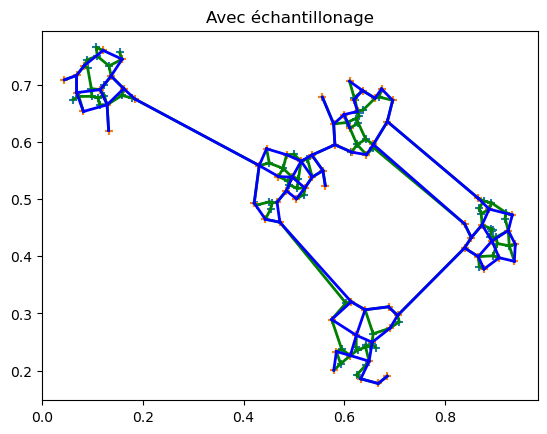

Durée sans échantillonage :  0.5937500000000003
Durée avec échantillonage :  0.09375000000000004
Temps gagné :  0.5000000000000003


In [19]:
c = 5
k = 30
perc = 0.5   # Pourcentage des points gardés après subsampling
P = uniform_clusters(c, k)
graph, tps = time_graph(quadra_algo_neighbors, P)


t_0 = time.process_time_ns()
p = P[np.random.randint(0, len(P))]
P_sub = Task2(P.copy(), p, int(len(P)*perc))
graph_sub = quadra_algo_neighbors(P_sub)
t_1 = time.process_time_ns()
tps_sub = (t_1 - t_0)*(0.1**9)

# Les résultats sans (resp. avec) échantillonage sont en vert (resp. bleu)
plot_graph(P, graph, "Sans échantillonage", c='g')
# Insérer plt.show() ici pour afficher les résultats dans deux graphiques différents
plot_graph(P_sub, graph_sub, "Avec échantillonage", c='b')
plt.show()

print("Durée sans échantillonage : ", tps)
print("Durée avec échantillonage : ", tps_sub)
print("Temps gagné : ", tps - tps_sub)

En jouant sur le nombre de points $k\_ech$ conservés par échantillonnage, nous voyons que les gains de temps sont grands lorsque $k\_ech$ est faible, mais nous perdons alors en précision. Cependant, il est clair qu'avec une telle distribution de points, le gain de temps dépasse largement la perte de précision. De plus, les imprécisions générées par le subsampling ne sont localisées aux points perdus : en s'éloignant des points supprimés, on retrouve exactement les mêmes arêtes.
Regardons maintenant pour une génation uniforme des points.

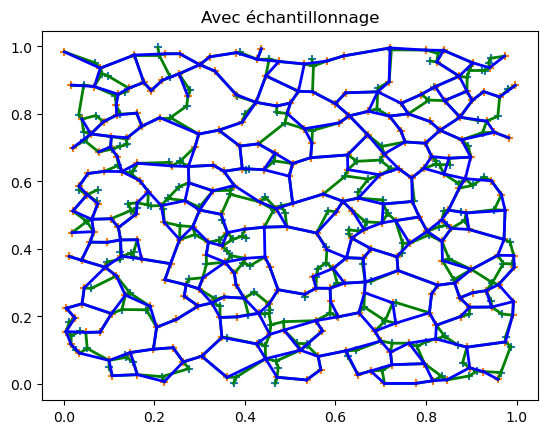

Durée sans échantillonnage :  4.000000000000002
Durée avec échantillonnage :  1.7187500000000009
Temps gagné :  2.281250000000001


In [20]:
nb_points = 500
perc = 0.6   # Pourcentage des points gardés après subsampling

P = generate_points_square(nb_points)
graph, tps = time_graph(quadra_algo_neighbors, P)


t_0 = time.process_time_ns()
p = P[np.random.randint(0, len(P))]
P_sub = Task2(P.copy(), p, int(len(P)*perc))
graph_sub = quadra_algo_neighbors(P_sub)
t_1 = time.process_time_ns()
tps_sub = (t_1 - t_0)*(0.1**9)

# Les résultats sans (resp. avec) échantillonage sont en vert (resp. bleu)
plot_graph(P, graph, "Sans échantillonnage", c='g')
# Insérer plt.show() ici pour afficher les résultats dans deux graphiques différents
plot_graph(P_sub, graph_sub, "Avec échantillonnage", c='b')
plt.show()

print("Durée sans échantillonnage : ", tps)
print("Durée avec échantillonnage : ", tps_sub)
print("Temps gagné : ", tps - tps_sub)

Ici encore, on remarque que le gain de temps est important et la perte de précision localisée. On en déduit que la forme générale du graphe sera toujours conservée tant que l'échantillonnage n'est pas extrême. Ici, même avec \verb{perc = 0.6}, les deux graphes sont proches alors que la durée d'exécution est plus que divisée par deux.

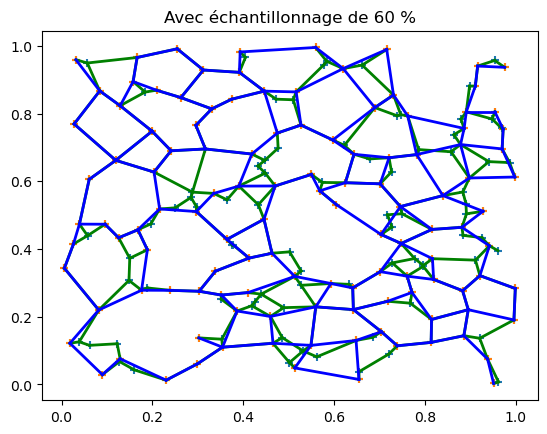

Durée sans échantillonnage:  0.5937500000000003
Durée avec échantillonnage de 60 % :  0.29687500000000017
Temps gagné :  0.29687500000000017


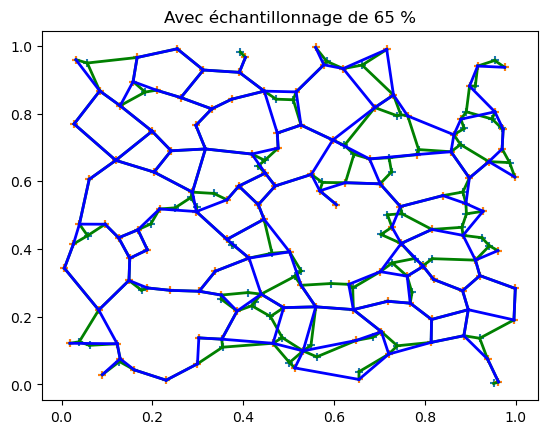

Durée sans échantillonnage:  0.4375000000000002
Durée avec échantillonnage de 65 % :  0.2500000000000001
Temps gagné :  0.1875000000000001


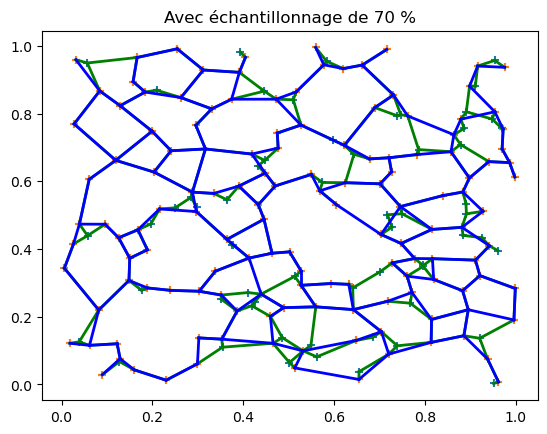

Durée sans échantillonnage:  0.4687500000000002
Durée avec échantillonnage de 70 % :  0.37500000000000017
Temps gagné :  0.09375000000000006


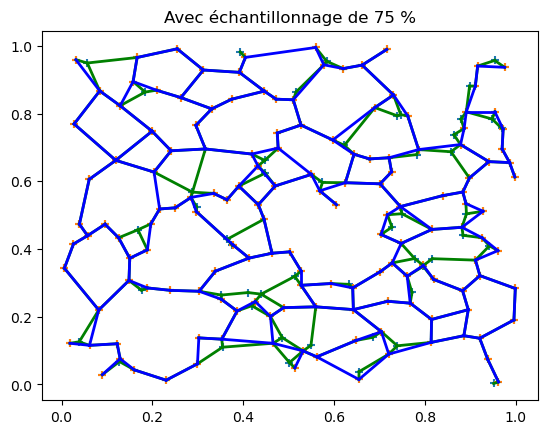

Durée sans échantillonnage:  0.7500000000000003
Durée avec échantillonnage de 75 % :  0.4687500000000002
Temps gagné :  0.2812500000000001


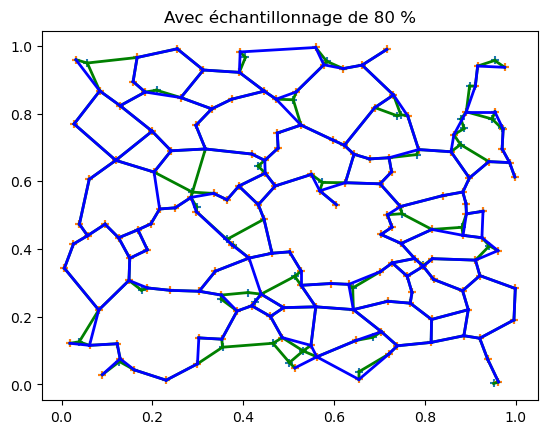

Durée sans échantillonnage:  0.6875000000000003
Durée avec échantillonnage de 80 % :  0.5156250000000002
Temps gagné :  0.1718750000000001


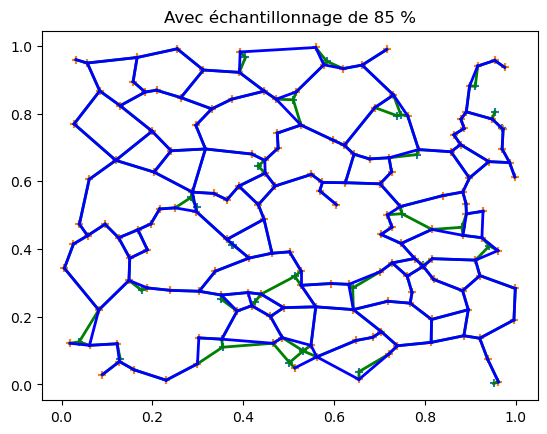

Durée sans échantillonnage:  0.7656250000000003
Durée avec échantillonnage de 85 % :  0.5937500000000003
Temps gagné :  0.171875


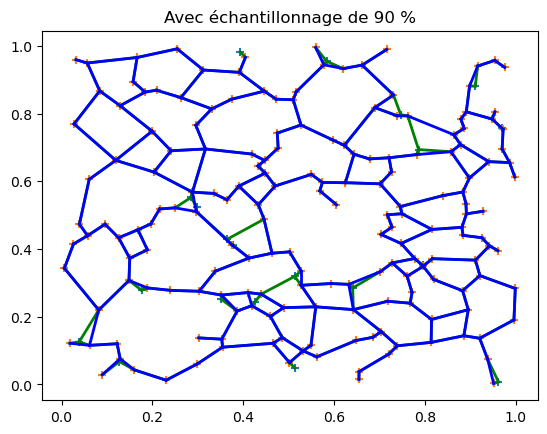

Durée sans échantillonnage:  0.4687500000000002
Durée avec échantillonnage de 90 % :  0.7187500000000003
Temps gagné :  -0.2500000000000001


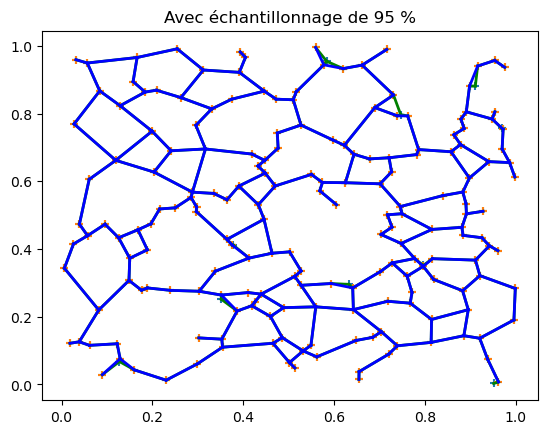

Durée sans échantillonnage:  0.5937500000000003
Durée avec échantillonnage de 95 % :  0.5625000000000002
Temps gagné :  0.03125000000000011


In [21]:
nb_points = 200
P = generate_points_square(nb_points)

for perc in range(60,100,5):
    graph, tps = time_graph(quadra_algo_neighbors, P)


    t_0 = time.process_time_ns()
    p = P[np.random.randint(0, len(P))]
    P_sub = Task2(P.copy(), p, int(len(P)*perc/100))
    graph_sub = quadra_algo_neighbors(P_sub)
    t_1 = time.process_time_ns()
    tps_sub = (t_1 - t_0)*(0.1**9)

    # Les résultats sans (resp. avec) échantillonage sont en vert (resp. bleu)
    plot_graph(P, graph, "Sans échantillonage", c='g')
    # Insérer plt.show() ici pour afficher les résultats dans deux graphiques différents
    plot_graph(P_sub, graph_sub, "Avec échantillonnage de "+str(perc)+" %", c='b')
    plt.show()

    print("Durée sans échantillonnage: ", tps)
    print("Durée avec échantillonnage de "+str(perc)+" % : ", tps_sub)
    print("Temps gagné : ", tps - tps_sub)

Gardons le même principe, mais en effectuant la mise à jour du graphe en même temps que l'échantillonage.

In [22]:
def graph_subsampling(P_ori, perc, index_start = -1):
    """Fusion des codes de Task 2 et update_graph. Code copié de Task 2 et adapté"""
    
    P = P_ori.copy()  # To not change P
    if index_start<0:
        index_start = np.random.randint(0, len(P))
    p = P[index_start]
    k = int(len(P)*perc)
    
    graph = [set()]
    S = [P.pop(P.index(p))]
    distP = {point: distanceE(point,S)[0] for point in P}
    
    for i in range(k-1):
        dMax = 0
        targetP = P[0]
        
        for point in P:
            if dMax < distP[point]:
                dMax = distP[point]
                targetP = point
        
        update_graph(graph, S, targetP) 
        S.append(targetP)
        P.pop(P.index(targetP))
        
        for point in P:
            distP[point] = min(distP[point],distance(point,targetP))
            
    return graph, S

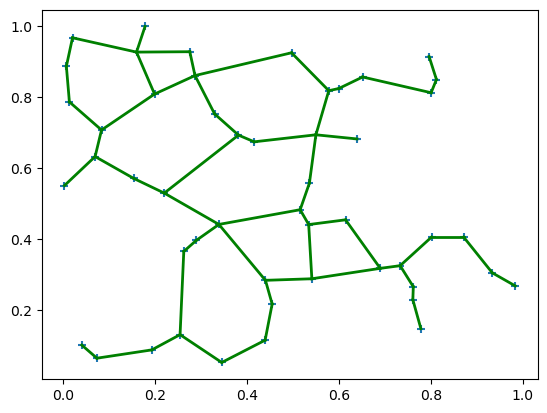

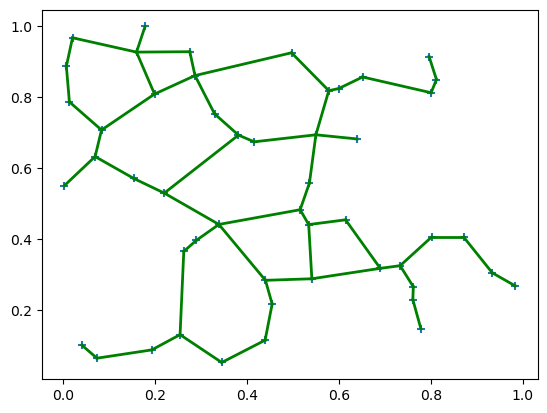

In [23]:
# Vérifions que la fonction marche correctement

perc = 1

P = generate_points_square(50)
g_test, P_sub = graph_subsampling(P, perc)
g_verif = quadra_algo_neighbors(P)

plot_graph(P, g_verif)
plt.show()
plot_graph(P_sub, g_test)

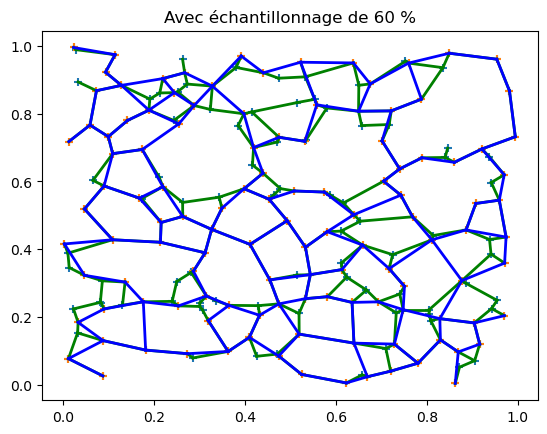

Durée sans échantillonnage:  0.7031250000000003
Durée avec échantillonnage de 60 % :  4.078125000000002
Temps gagné :  -3.3750000000000013


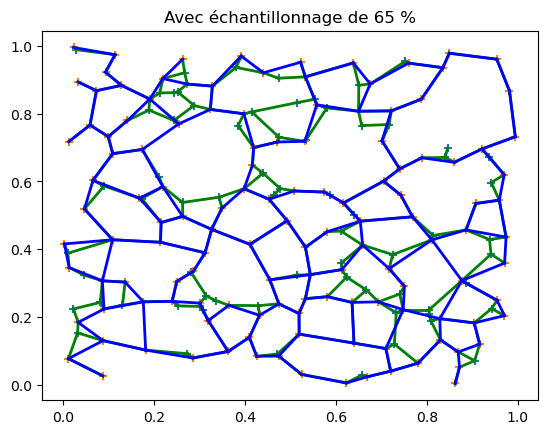

Durée sans échantillonnage:  0.5156250000000002
Durée avec échantillonnage de 65 % :  4.656250000000002
Temps gagné :  -4.140625000000002


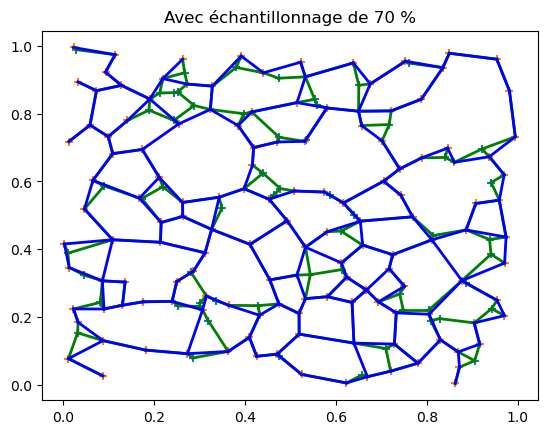

Durée sans échantillonnage:  0.5625000000000002
Durée avec échantillonnage de 70 % :  5.703125000000003
Temps gagné :  -5.140625000000003


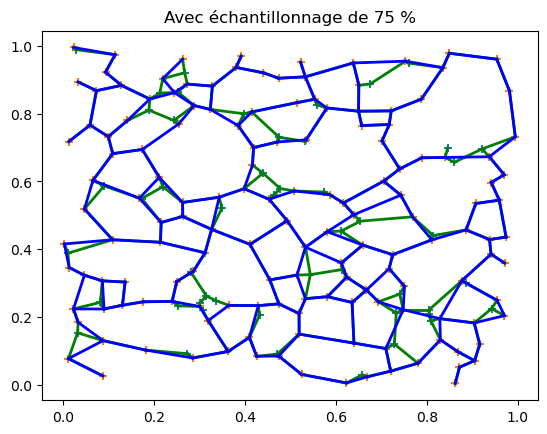

Durée sans échantillonnage:  0.7656250000000003
Durée avec échantillonnage de 75 % :  7.1250000000000036
Temps gagné :  -6.3593750000000036


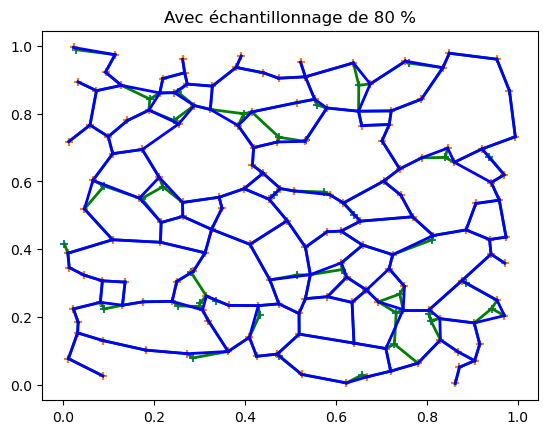

Durée sans échantillonnage:  0.7031250000000003
Durée avec échantillonnage de 80 % :  9.875000000000005
Temps gagné :  -9.171875000000005


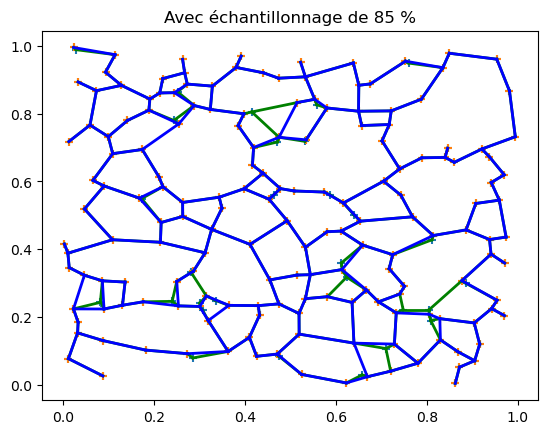

Durée sans échantillonnage:  0.8593750000000004
Durée avec échantillonnage de 85 % :  10.468750000000005
Temps gagné :  -9.609375000000005


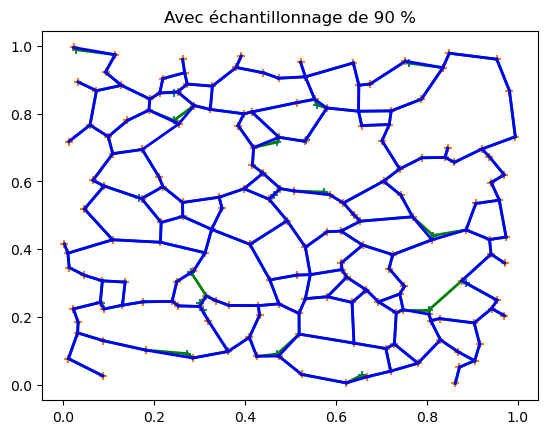

Durée sans échantillonnage:  0.5312500000000002
Durée avec échantillonnage de 90 % :  11.093750000000005
Temps gagné :  -10.562500000000005


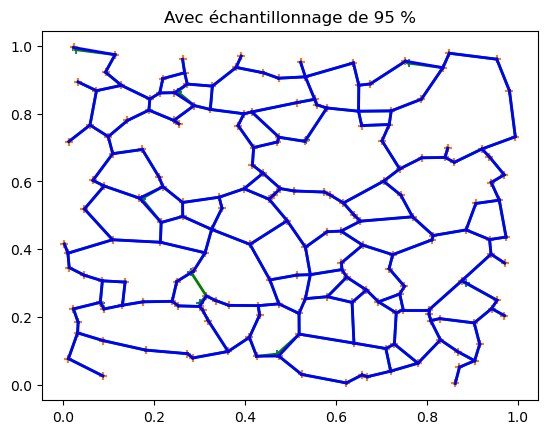

Durée sans échantillonnage:  0.5312500000000002
Durée avec échantillonnage de 95 % :  14.296875000000007
Temps gagné :  -13.765625000000007


In [24]:
# Mesures de perfomances et de précisions avec la nouvelle fonction

nb_points = 200
P = generate_points_square(nb_points)

for perc in range(60,100,5):
    
    graph, tps = time_graph(quadra_algo_neighbors, P)
    
    t_0 = time.process_time_ns()
    graph_sub, P_sub = graph_subsampling(P, perc/100)
    t_1 = time.process_time_ns()
    tps_sub = (t_1 - t_0)*(0.1**9)

    # Les résultats sans (resp. avec) échantillonage sont en vert (resp. bleu)
    plot_graph(P, graph, "Sans échantillonage", c='g')
    # Insérer plt.show() ici pour afficher les résultats dans deux graphiques différents
    plot_graph(P_sub, graph_sub, "Avec échantillonnage de "+str(perc)+" %", c='b')
    plt.show()

    print("Durée sans échantillonnage: ", tps)
    print("Durée avec échantillonnage de "+str(perc)+" % : ", tps_sub)
    print("Temps gagné : ", tps - tps_sub)

Nous en déduisons qu'il est préférable de faire le subsampling avant de créer le graphe et non de faire les deux en même temps